In [1]:
import numpy as np
import pandas as pd
file_data = pd.read_csv('./data/lianjia_houses.csv',encoding='gbk')
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [2]:
#查看数据的摘要信息
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [3]:
#查看数值型数据的分布情况
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


## 数据清洗（数据预处理）

In [10]:
#2.1检查重复记录
file_data[file_data.duplicated()==True]

,区域,小区名称,户型,面积(㎡),价格(元/月)
65,东城,金鱼池东区,2室1厅,66.46平米,6000
66,东城,凯德华玺,2房间1卫,73.86平米,13000
67,东城,沙井胡同,2室1厅,25.15平米,7900
68,东城,沙井胡同,1室1厅,12.3平米,4200
69,东城,安贞苑50号院,2室1厅,65.82平米,6900
...,...,...,...,...,...
8196,顺义,仓上小区,3室1厅,108.03平米,3900
8197,顺义,石园东区,2室1厅,91.93平米,4100
8198,顺义,裕龙三区,1室1厅,69.04平米,3800
8199,顺义,建新北区,2室1厅,50.04平米,3600


In [11]:
#2.2删除重复记录
file_data.drop_duplicates(inplace=True)
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [14]:
#2.3检查有无缺失值与空值
file_data.isnull().sum()

区域         0
小区名称       0
户型         0
面积(㎡)      0
价格(元/月)    0
dtype: int64

In [15]:
#2.4统一数据格式并转换数据类型
file_data['面积(㎡)']

0        59.11平米
1        56.92平米
2        40.57平米
3        57.09平米
4        42.67平米
          ...   
8218    114.03平米
8219        59平米
8220     92.41平米
8221     71.81平米
8222     35.43平米
Name: 面积(㎡), Length: 5773, dtype: object

In [16]:
type(file_data['面积(㎡)'])

pandas.core.series.Series

In [19]:
file_data['面积(㎡)'] = file_data['面积(㎡)'].apply(lambda x:x[:-2]).astype('float64')
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [20]:
# 方法二：
# new_arr = np.array([])
# for i in file_data['面积(㎡)']:
#     new_arr = np.append(new_arr, i[:-2])
# new_arr = new_arr.astype(np.float64)
# file_data.loc[:,'面积(㎡)'] = new_arr
# file_data.tail()

In [24]:
#将户型这一列统一为“*室*厅”或“*室*卫”格式

file_data['户型'] = file_data['户型'].apply(lambda x:x.replace('房间','室'))
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [25]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   区域       5773 non-null   object 
 1   小区名称     5773 non-null   object 
 2   户型       5773 non-null   object 
 3   面积(㎡)    5773 non-null   float64
 4   价格(元/月)  5773 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 270.6+ KB


In [56]:
#c重置索引号
file_data.reset_index(drop=True,inplace=True)
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200


## 数据分析与展示

In [59]:
#3.1统计房源数据分析
#统计出哥哥区域的房源数量
df_area = file_data.groupby('区域').agg({'小区名称':'count'}).reset_index().rename(
    columns={'小区名称':'房源数量'}).sort_values('房源数量',ascending=False).reset_index(drop=True)
df_area

,区域,房源数量
0,朝阳,1597
1,海淀,605
2,丰台,577
3,通州,477
4,西城,442
5,大兴,362
6,昌平,347
7,顺义,297
8,门头沟,285
9,东城,282


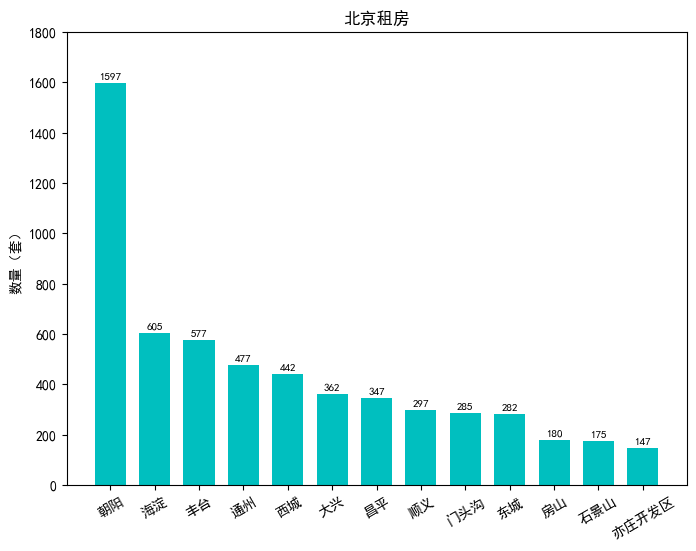

In [60]:
#利用区域房源数据用柱形图展示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8,6),dpi=100)

bar_rect = plt.bar(df_area['区域'],df_area['房源数量'],color='c',width=0.7)
plt.ylim(0,1800)
plt.title('北京租房')
plt.ylabel('数量（套）')
plt.xticks(rotation=30)
#添加注释文本
def autolabel(rects):
    for rect in rects:
        rect_height =rect.get_height()
        rect_x = rect.get_x()
        rect_width = rect.get_width()
        plt.text(rect_x + rect_width / 2,rect_height +10,
                 s='{}'.format(rect_height),ha='center',va='bottom',fontsize=8)
autolabel(bar_rect)
plt.show()

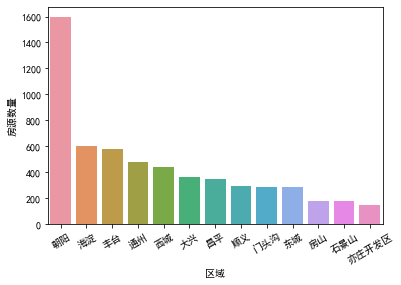

In [61]:
#seaborn画个简图
import seaborn as sns
sns.barplot(x='区域',y='房源数量',data=df_area)
plt.xticks(rotation=30)
plt.show()

In [65]:
#3.1统计房源数据分析
#统计出不同户型的房源数量
df_houses = file_data.groupby('户型').agg({'小区名称':'count'}).reset_index().rename(
    columns={'小区名称':'房源数量'}).sort_values('房源数量',ascending=False).iloc[:10,:].reset_index(drop=True)
df_houses

,户型,房源数量
0,2室1厅,2249
1,1室1厅,844
2,3室1厅,766
3,3室2厅,489
4,2室2厅,265
5,1室0厅,244
6,4室2厅,191
7,1室1卫,126
8,2室1卫,120
9,3室1卫,92


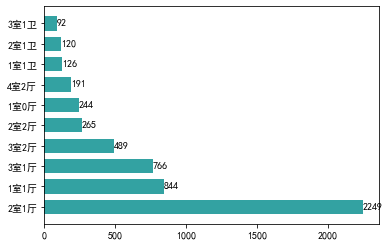

In [66]:
#将户型数据可视化（条形图）
plt.barh(df_houses['户型'],df_houses['房源数量'],height=0.7,color='darkcyan',alpha=0.8)
house_type_num = df_houses['房源数量']
for x,y in enumerate(house_type_num):
    plt.text(y+0.2,x-0.1,'{}'.format(y))
plt.show()

## 3.3房源各区房源平均租金

In [67]:
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200


In [70]:
df_all = file_data.groupby('区域',as_index=False).sum().rename(columns={'面积(㎡)':'总面积(㎡)','价格(元/月)':'房租总金额'})
df_all

,区域,总面积(㎡),房租总金额
0,东城,27353.99,3945550
1,丰台,50922.79,4404893
2,亦庄开发区,15995.53,1318400
3,大兴,35884.15,2286950
4,房山,15275.41,726750
5,昌平,35972.92,2521515
6,朝阳,166921.72,20281396
7,海淀,57210.39,7279350
8,石景山,13956.67,1156500
9,西城,37141.64,5636975


In [71]:
df_all['每平米租金（元）'] = round(df_all['房租总金额']/df_all['总面积(㎡)'],2)
df_all

,区域,总面积(㎡),房租总金额,每平米租金（元）
0,东城,27353.99,3945550,144.24
1,丰台,50922.79,4404893,86.50
2,亦庄开发区,15995.53,1318400,82.42
3,大兴,35884.15,2286950,63.73
4,房山,15275.41,726750,47.58
5,昌平,35972.92,2521515,70.09
6,朝阳,166921.72,20281396,121.50
7,海淀,57210.39,7279350,127.24
8,石景山,13956.67,1156500,82.86
9,西城,37141.64,5636975,151.77


In [72]:
df_all.apply(lambda x:round(x['房租总金额']/x['总面积(㎡)'],2),axis=1)

0     144.24
1      86.50
2      82.42
3      63.73
4      47.58
5      70.09
6     121.50
7     127.24
8      82.86
9     151.77
10     58.33
11     51.75
12     65.07
dtype: float64

## 合并数据

In [76]:
df_merged = pd.merge(df_all,df_area,on='区域',how='inner')
df_merged

,区域,总面积(㎡),房租总金额,每平米租金（元）,房源数量
0,东城,27353.99,3945550,144.24,282
1,丰台,50922.79,4404893,86.50,577
2,亦庄开发区,15995.53,1318400,82.42,147
3,大兴,35884.15,2286950,63.73,362
4,房山,15275.41,726750,47.58,180
5,昌平,35972.92,2521515,70.09,347
6,朝阳,166921.72,20281396,121.50,1597
7,海淀,57210.39,7279350,127.24,605
8,石景山,13956.67,1156500,82.86,175
9,西城,37141.64,5636975,151.77,442


In [77]:
#可视化

In [81]:
#3.4房源面积区间分析
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
5768,顺义,怡馨家园,3室1厅,114.03,5500
5769,顺义,旭辉26街区,4室2卫,59.00,5000
5770,顺义,前进花园玉兰苑,3室1厅,92.41,5800
5771,顺义,双裕小区,2室1厅,71.81,4200


In [82]:
file_data['面积(㎡)'].min()

11.63

In [83]:
file_data['面积(㎡)'].max()

1133.0

In [85]:
#面积划分
area_divide = [1,30,50,70,90,120,140,160,12000]
pd.cut(list(file_data['面积(㎡)']),bins=area_divide).describe()

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 12000]",625,0.108263


1212213